In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
train_path = "C:\\Users\\sreya\\Downloads\\train_data.txt"
df_train = pd.read_csv(train_path, sep=':::', names = ['Title', 'Genre', 'Description'], engine='python')

In [3]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None


In [4]:
df_train

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [5]:
print(df_train.describe())

                  Title    Genre  \
count             54214    54214   
unique            54214       27   
top      Origin (2011)    drama    
freq                  1    13613   

                                              Description  
count                                               54214  
unique                                              54086  
top      Grammy - music award of the American academy ...  
freq                                                   12  


In [6]:
test_path = "C:\\Users\\sreya\\Downloads\\train_data.txt"
df_test = pd.read_csv(test_path, sep=':::', names = ['Title', 'Genre', 'Description'], engine='python')

In [7]:
df_test.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Origin (2011),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [8]:
df_test

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [10]:
df_train.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [11]:
df_test.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

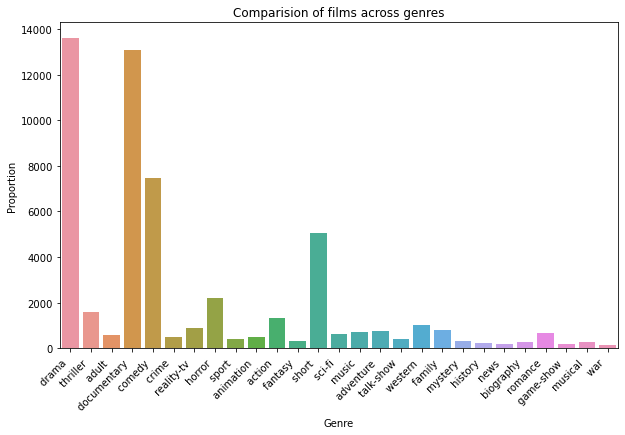

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='Genre')
plt.xlabel('Genre')
plt.ylabel('Proportion')
plt.title('Comparision of films across genres')
plt.xticks(rotation=45, ha='right')
plt.show()

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [14]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sreya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sreya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sreya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_train['Genre_Label'] = label_encoder.fit_transform(df_train['Genre'])
df_test['Genre_Label'] = label_encoder.fit_transform(df_test['Genre'])

In [16]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def cleaning_data(text):
    text = text.lower()
    
    words = text.split()
    filtered_words = []
    for word in words:
        if not (word[:1] == '@' or word[:4] == 'http'):
            filtered_words.append(word)
    
    text = ' '.join(filtered_words)
    filtered_chars = []
    for char in text:
        if char.isalpha() or char == ' ':
            filtered_chars.append(char)
            
    #words = nltk.word_tokenize(text)
    text = ''.join(filtered_chars)
    words = nltk.word_tokenize(text)
    
    filtered_words = []
    for word in words:
        if word not in stop_words and len(word) > 2:
            filtered_words.append(word)
            
    text = " ".join(filtered_words)
    #text = " ".join(text.split())
    return text

df_train["TextCleaning"] = df_train["Description"].apply(cleaning_data)
df_test["TextCleaning"] = df_test["Description"].apply(cleaning_data)

In [17]:
df_train

,Title,Genre,Description,Genre_Label,TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8,listening conversation doctor parents yearold ...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8,films title refers unrecovered bodies ground z...
...,...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,5,shortlived nbc live sitcom centered bonino wor...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,13,next generation exploitation sisters kapa bay ...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",7,bestaan echt standup comedy growing facing fea...
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,5,walter vivian live country difficult time keep...


In [18]:
df_test

,Title,Genre,Description,Genre_Label,TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8,listening conversation doctor parents yearold ...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8,films title refers unrecovered bodies ground z...
...,...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,5,shortlived nbc live sitcom centered bonino wor...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,13,next generation exploitation sisters kapa bay ...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",7,bestaan echt standup comedy growing facing fea...
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,5,walter vivian live country difficult time keep...


In [19]:
vectorize = TfidfVectorizer()
X_train = vectorize.fit_transform(df_train['TextCleaning'])
X_test = vectorize.transform(df_test['TextCleaning'])

In [20]:
X_train

<54214x146623 sparse matrix of type '<class 'numpy.float64'>'
	with 2620420 stored elements in Compressed Sparse Row format>

In [21]:
X_test

<54214x146623 sparse matrix of type '<class 'numpy.float64'>'
	with 2620420 stored elements in Compressed Sparse Row format>

In [22]:
df_train

,Title,Genre,Description,Genre_Label,TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8,listening conversation doctor parents yearold ...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8,films title refers unrecovered bodies ground z...
...,...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,5,shortlived nbc live sitcom centered bonino wor...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,13,next generation exploitation sisters kapa bay ...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",7,bestaan echt standup comedy growing facing fea...
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,5,walter vivian live country difficult time keep...


In [23]:
df_test

,Title,Genre,Description,Genre_Label,TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8,listening conversation doctor parents yearold ...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8,films title refers unrecovered bodies ground z...
...,...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,5,shortlived nbc live sitcom centered bonino wor...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,13,next generation exploitation sisters kapa bay ...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",7,bestaan echt standup comedy growing facing fea...
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,5,walter vivian live country difficult time keep...


In [24]:
from sklearn.linear_model import LogisticRegression

# Example text data and labels
X = df_train['TextCleaning']  # Your cleaned text data
y = df_train['Genre_Label']  # Your target variable

# Convert the text data into TF-IDF vectors
#tfidf = TfidfVectorizer(max_features=5000)
#X_tfidf = tfidf.fit_transform(X)

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train the SVM model
#model = SVC(kernel='linear')
#model.fit(X_train, y_train)


In [25]:
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [27]:
logreg = LogisticRegression()
logreg

LogisticRegression()

In [28]:
logreg.fit(X_train, y_train)

C:\Users\sreya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#X_train_pred = model.predict(X_train)
#X_train_pred

In [29]:
logreg.score(X_train, y_train)

0.6665283253787093

In [30]:
y_pred = logreg.predict(X_test)
y_pred

array([ 8,  8,  5, ...,  8, 21, 13])

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.5787143779396846


In [32]:
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.25      0.33       263
           1       0.77      0.21      0.34       112
           2       0.42      0.16      0.23       139
           3       0.57      0.08      0.14       104
           4       0.00      0.00      0.00        61
           5       0.51      0.57      0.54      1443
           6       0.20      0.01      0.02       107
           7       0.67      0.84      0.75      2659
           8       0.54      0.78      0.64      2697
           9       0.47      0.09      0.16       150
          10       0.00      0.00      0.00        74
          11       0.94      0.40      0.56        40
          12       0.00      0.00      0.00        45
          13       0.64      0.56      0.60       431
          14       0.65      0.49      0.56       144
          15       0.25      0.02      0.04        50
          16       0.00      0.00      0.00        56
   

C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.naive_bayes import MultinomialNB

X = df_train['TextCleaning']  
y = df_train['Genre_Label']

In [34]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [35]:
y_predict = mnb.predict(X_test)
y_predict

array([ 8,  8,  8, ...,  8, 21, 13])

In [36]:
accuracy = accuracy_score(y_test, y_predict)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.5201512496541547


In [37]:
cr = classification_report(y_test, y_predict)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.09      0.15       263
           1       1.00      0.05      0.10       112
           2       0.40      0.04      0.08       139
           3       0.00      0.00      0.00       104
           4       0.00      0.00      0.00        61
           5       0.50      0.43      0.46      1443
           6       0.00      0.00      0.00       107
           7       0.58      0.88      0.70      2659
           8       0.45      0.83      0.59      2697
           9       1.00      0.01      0.01       150
          10       0.00      0.00      0.00        74
          11       1.00      0.15      0.26        40
          12       0.00      0.00      0.00        45
          13       0.73      0.34      0.47       431
          14       0.85      0.12      0.21       144
          15       0.00      0.00      0.00        50
          16       0.00      0.00      0.00        56
   

C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
from sklearn.naive_bayes import BernoulliNB

X = df_train['TextCleaning']  
y = df_train['Genre_Label']

In [39]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB()

In [40]:
y_predict_bnb = mnb.predict(X_test)
y_predict_bnb

array([ 8,  8,  8, ...,  8, 21, 13])

In [41]:
accuracy = accuracy_score(y_test, y_predict_bnb)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.5201512496541547


In [42]:
cr = classification_report(y_test, y_predict_bnb)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.09      0.15       263
           1       1.00      0.05      0.10       112
           2       0.40      0.04      0.08       139
           3       0.00      0.00      0.00       104
           4       0.00      0.00      0.00        61
           5       0.50      0.43      0.46      1443
           6       0.00      0.00      0.00       107
           7       0.58      0.88      0.70      2659
           8       0.45      0.83      0.59      2697
           9       1.00      0.01      0.01       150
          10       0.00      0.00      0.00        74
          11       1.00      0.15      0.26        40
          12       0.00      0.00      0.00        45
          13       0.73      0.34      0.47       431
          14       0.85      0.12      0.21       144
          15       0.00      0.00      0.00        50
          16       0.00      0.00      0.00        56
   

C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

model = MultinomialNB()

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
    'fit_prior': [True, False]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'alpha': 2.0, 'fit_prior': False}
Accuracy: 0.5443143041593654
              precision    recall  f1-score   support

           0       0.31      0.38      0.34       263
           1       0.50      0.20      0.28       112
           2       0.32      0.17      0.22       139
           3       0.43      0.06      0.10       104
           4       0.00      0.00      0.00        61
           5       0.47      0.56      0.51      1443
           6       0.08      0.01      0.02       107
           7       0.69      0.76      0.72      2659
           8       0.58      0.65      0.61      2697
           9       0.30      0.09      0.14       150
          10       0.00      0.00      0.00        74
          11       0.77      0.60      0.68        40
          12       0.00      0.00      0.00        45
          13       0.48      0.70      0.57       431
          14       0.38      0.67      0.48    

C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
X1 = df_test['TextCleaning']  
y1 = df_test['Genre_Label']

In [47]:
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X1)

In [52]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_tfidf, y1, test_size=0.2, random_state=42)

In [53]:
logreg = LogisticRegression()
logreg

LogisticRegression()

In [54]:
logreg.fit(X_train_2, y_train_2)

C:\Users\sreya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
logreg.score(X_train_2, y_train_2)

0.6665283253787093

In [56]:
y_pred_2 = logreg.predict(X_test_2)
y_pred_2

array([ 8,  8,  5, ...,  8, 21, 13])

In [57]:
accuracy_2 = accuracy_score(y_test_2, y_pred_2)
print("Validation Accuracy:", accuracy_2)

Validation Accuracy: 0.5787143779396846


In [58]:
cr_2 = classification_report(y_test_2, y_pred_2)
print("Classification Report:\n", cr_2)

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.25      0.33       263
           1       0.77      0.21      0.34       112
           2       0.42      0.16      0.23       139
           3       0.57      0.08      0.14       104
           4       0.00      0.00      0.00        61
           5       0.51      0.57      0.54      1443
           6       0.20      0.01      0.02       107
           7       0.67      0.84      0.75      2659
           8       0.54      0.78      0.64      2697
           9       0.47      0.09      0.16       150
          10       0.00      0.00      0.00        74
          11       0.94      0.40      0.56        40
          12       0.00      0.00      0.00        45
          13       0.64      0.56      0.60       431
          14       0.65      0.49      0.56       144
          15       0.25      0.02      0.04        50
          16       0.00      0.00      0.00        56
   

C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
from sklearn.naive_bayes import MultinomialNB

X = df_test['TextCleaning']  
y = df_test['Genre_Label']

In [60]:
mnb = MultinomialNB()
mnb.fit(X_train_2, y_train_2)

MultinomialNB()

In [61]:
y_predict = mnb.predict(X_test_2)
y_predict

array([ 8,  8,  8, ...,  8, 21, 13])

In [63]:
accuracy = accuracy_score(y_test_2, y_predict)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.5201512496541547


In [64]:
cr = classification_report(y_test_2, y_predict)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.09      0.15       263
           1       1.00      0.05      0.10       112
           2       0.40      0.04      0.08       139
           3       0.00      0.00      0.00       104
           4       0.00      0.00      0.00        61
           5       0.50      0.43      0.46      1443
           6       0.00      0.00      0.00       107
           7       0.58      0.88      0.70      2659
           8       0.45      0.83      0.59      2697
           9       1.00      0.01      0.01       150
          10       0.00      0.00      0.00        74
          11       1.00      0.15      0.26        40
          12       0.00      0.00      0.00        45
          13       0.73      0.34      0.47       431
          14       0.85      0.12      0.21       144
          15       0.00      0.00      0.00        50
          16       0.00      0.00      0.00        56
   

C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
